In [1]:
import pandas as pd
df = pd.read_excel('data/Statistics.xlsx', sheet_name = 'Offer Code_N3UD')
df = df.drop([0,1], axis = 0)
df = df.reset_index(drop = True)
df.columns = ['Column 1', 'Column 2']
df

,Column 1,Column 2
0,N3UD,1597
1,2021,467
2,C,46
3,R,403
4,U,1
5,(blank),17
6,2022,564
7,C,54
8,R,496
9,U,5


In [2]:
dff = df.drop(0, axis = 0)
dff = dff.drop(16, axis = 0)
dff.loc[dff['Column 1'] == 'C', 'Column 1'] = 'Conditional'
dff.loc[dff['Column 1'] == 'R', 'Column 1'] = 'Rejected'
dff.loc[dff['Column 1'] == 'U', 'Column 1'] = 'Unconditional'
dff.loc[dff['Column 1'] == '(blank)', 'Column 1'] = 'N/A'
dff

,Column 1,Column 2
1,2021,467
2,Conditional,46
3,Rejected,403
4,Unconditional,1
5,N/A,17
6,2022,564
7,Conditional,54
8,Rejected,496
9,Unconditional,5
10,N/A,9


In [3]:
#select only rows with year in the 1st column
years_df = dff[dff['Column 1'].str.match(r"\d{4}")]
years_df = years_df.reset_index(drop = True)
years_df.columns = ['Application year', 'Number of applicants']
years = years_df['Application year'].tolist()
totals = years_df['Number of applicants'].tolist()

In [4]:
C_df = dff[dff['Column 1'] == 'Conditional']
C_df = C_df.reset_index(drop = True)
C_df.columns = ['Application year', 'Number of applicants']
C = C_df['Number of applicants'].tolist()

R_df = dff[dff['Column 1'] == 'Rejected']
R_df = R_df.reset_index(drop = True)
R_df.columns = ['Application year', 'Number of applicants']
R = R_df['Number of applicants'].tolist()

U_df = dff[dff['Column 1'] == 'Unconditional']
U_df = U_df.reset_index(drop = True)
U_df.columns = ['Application year', 'Number of applicants']
U = U_df['Number of applicants'].tolist()

NA_df = dff[dff['Column 1'] == 'N/A']
NA_df = NA_df.reset_index(drop = True)
NA_df.columns = ['Application year', 'Number of applicants']
NA = NA_df['Number of applicants'].tolist()

In [5]:
years_df

,Application year,Number of applicants
0,2021,467
1,2022,564
2,2023,566


In [6]:
C_df

,Application year,Number of applicants
0,Conditional,46
1,Conditional,54
2,Conditional,20


In [7]:
R_df

,Application year,Number of applicants
0,Rejected,403
1,Rejected,496
2,Rejected,155


In [8]:
U_df

,Application year,Number of applicants
0,Unconditional,1
1,Unconditional,5
2,Unconditional,1


In [9]:
NA_df

,Application year,Number of applicants
0,N/A,17
1,N/A,9
2,N/A,390


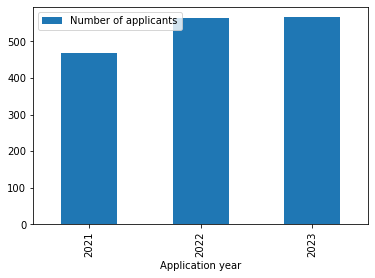

In [10]:
import matplotlib.pyplot as plt
years_df.plot.bar(x = 'Application year', y = 'Number of applicants');

In [11]:
tailored_df = pd.DataFrame()
tailored_df['year']= years
tailored_df['Conditional']= C
tailored_df['Rejected']= R
tailored_df['Unconditional']= U
tailored_df['Not available']= NA
tailored_df['Total']= totals
tailored_df['Conditional%']= tailored_df['Conditional']/tailored_df['Total']*100
tailored_df['Rejected%']= tailored_df['Rejected']/tailored_df['Total']*100
tailored_df['Unconditional%']= tailored_df['Unconditional']/tailored_df['Total']*100
tailored_df['Not available%']= tailored_df['Not available']/tailored_df['Total']*100

In [12]:
tailored_df

,year,Conditional,Rejected,Unconditional,Not available,Total,Conditional%,Rejected%,Unconditional%,Not available%
0,2021,46,403,1,17,467,9.850107,86.295503,0.214133,3.640257
1,2022,54,496,5,9,564,9.574468,87.943262,0.886525,1.595745
2,2023,20,155,1,390,566,3.533569,27.385159,0.176678,68.904594


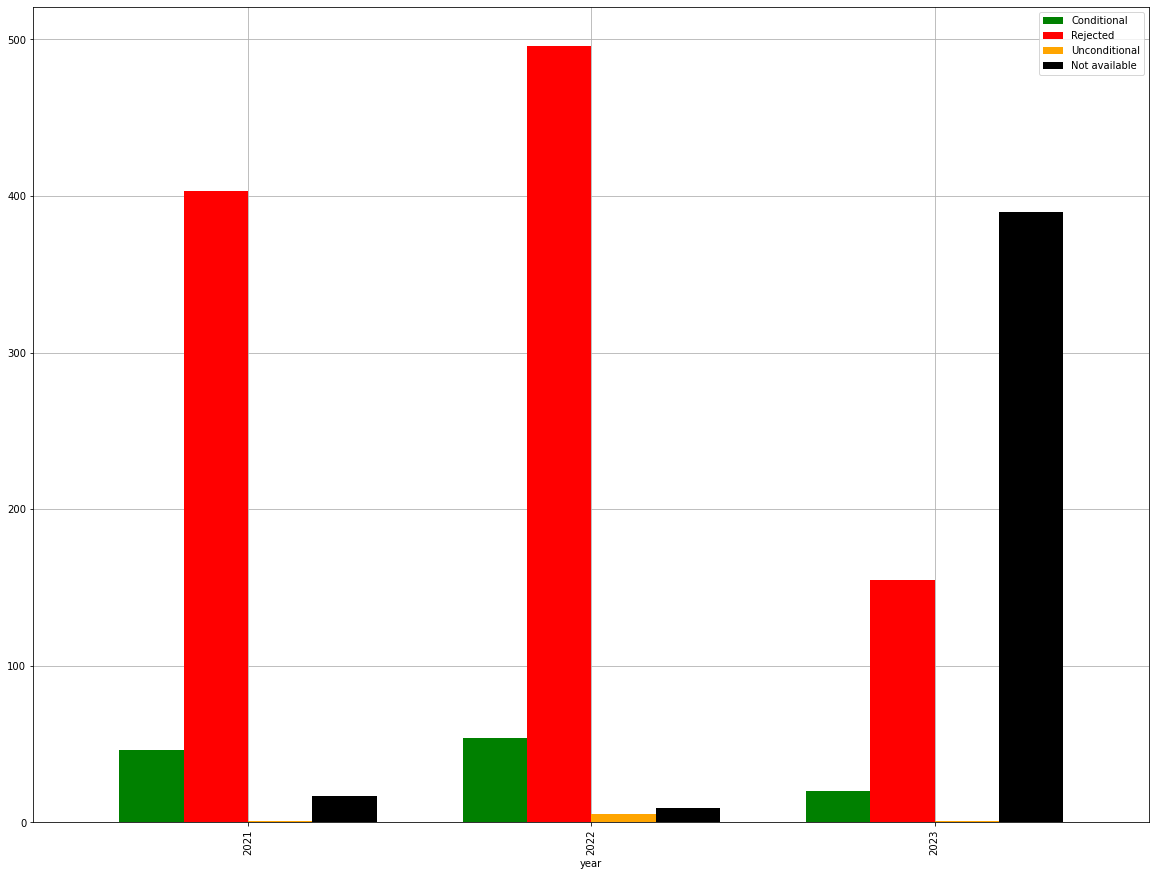

In [13]:
tailored_df.plot(x='year', y=['Conditional', 'Rejected', 'Unconditional', 'Not available'], kind='bar', figsize = (20, 15), color=['green', 'red', 'orange', 'black'], width = 0.75, zorder = 2);
plt.grid(True, zorder = 0);

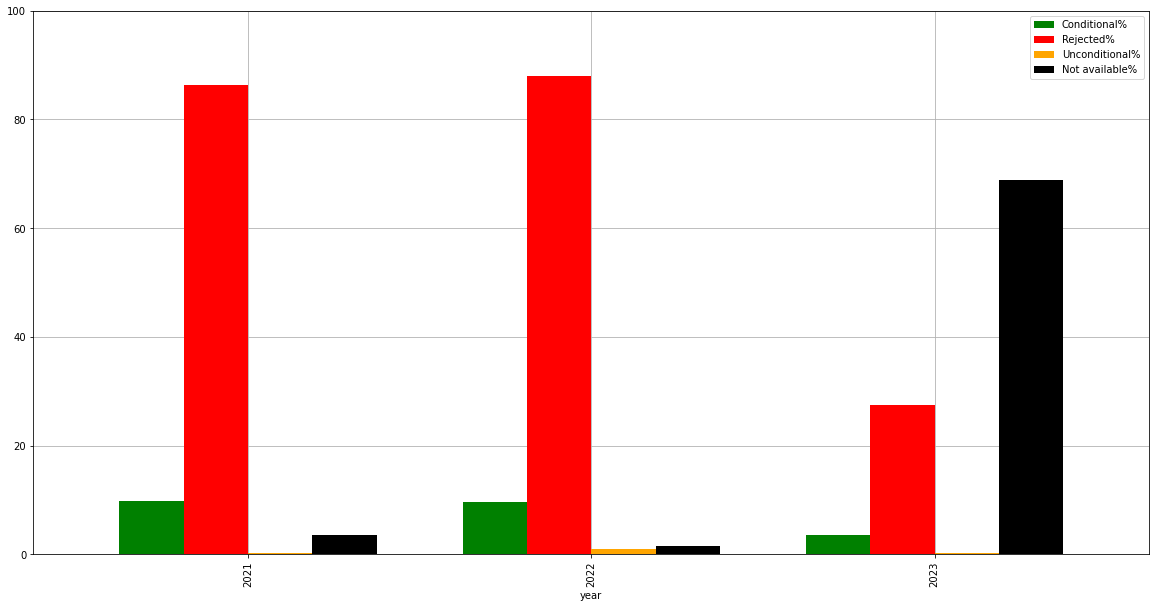

In [14]:
tailored_df.plot(x='year', y=['Conditional%', 'Rejected%', 'Unconditional%', 'Not available%'], kind='bar', figsize = (20, 10), color=['green', 'red', 'orange', 'black'], width = 0.75, zorder = 2);
plt.grid(True, zorder = 0);
plt.ylim(0, 100);

<BarContainer object of 3 artists>

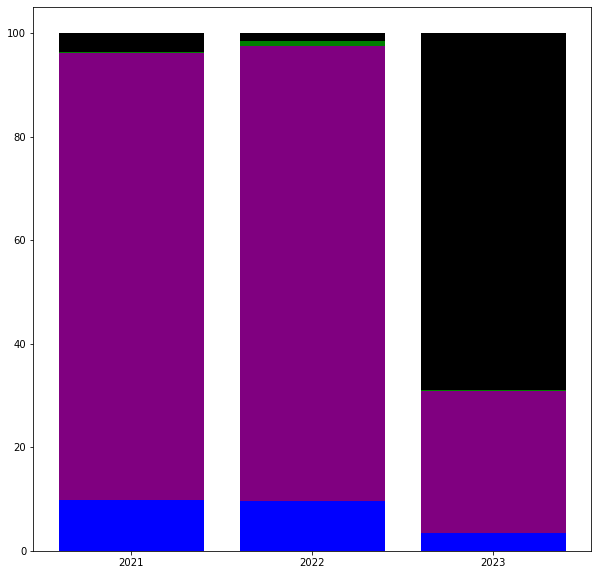

In [21]:
plt.figure(figsize = (10,10))
plt.bar(years, tailored_df['Conditional%'], color = 'blue')
plt.bar(years, tailored_df['Rejected%'], bottom = tailored_df['Conditional%'], color = 'purple')
plt.bar(years, tailored_df['Unconditional%'], bottom = tailored_df['Rejected%']+tailored_df['Conditional%'], color = 'green')
plt.bar(years, tailored_df['Not available%'], bottom = tailored_df['Conditional%']+tailored_df['Rejected%']+tailored_df['Unconditional%'], color = 'black')

In [34]:
tailored_df.plot.pie(y='Conditional', labels=tailored_df['year'], autopct='%d%%');
plt.legend(years, loc='upper left');

TypeError: RangeIndex.name must be a hashable type